<a href="https://colab.research.google.com/github/Amrit-kaur-github/BinanaceCoin_mlProject/blob/main/BinanceCoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


url = "/content/sample_data/Binance Coin - Historic data.csv"
data = pd.read_csv(url)

In this file, timeframe is of 1 day usually it can be of 1 minute,1 hour or 1 day it depennds upon the data  
Open Price : The Stock at which opens at the start of market

High price : The particular stock which made high during that particular day

Low Price : The Particular stock which made Low during that particular day

Close Price : The stock closing at the end of the Market hours

Volume: Volume is the number of shares of a stock that have changed hands over a certain period of time, typically one day. Stocks with higher volumes have more investors interested in buying or selling them.
or can say Volume column represents the trading volume of the cryptocurrency during that specific timestamp

In [ ]:
print("before",data)
data = data.loc[::-1]
print("after",data)

before               Date  Price(in dollars)    Open    High     Low     Vol.  \
0     Jul 27, 2021             303.29  304.31  307.62  298.53    2.26M   
1     Jul 26, 2021             304.31  302.60  327.62  301.19    2.86M   
2     Jul 25, 2021             302.57  302.55  303.09  292.85    1.25M   
3     Jul 24, 2021             303.15  298.91  305.01  296.16    1.81M   
4     Jul 23, 2021             298.89  293.51  301.15  281.68    1.98M   
...            ...                ...     ...     ...     ...      ...   
1352  Nov 13, 2017               1.68    1.49    1.74    1.49  166.01K   
1353  Nov 12, 2017               1.49    1.66    1.70    1.34  456.48K   
1354  Nov 11, 2017               1.66    1.71    1.93    1.58  256.71K   
1355  Nov 10, 2017               1.71    1.99    2.02    1.60  483.23K   
1356  Nov 09, 2017               1.99    1.99    2.20    1.90  283.35K   

      Change%  
0       -0.33  
1        0.58  
2       -0.19  
3        1.42  
4        1.83  
...     

In [ ]:
data.head()

,Date,Price(in dollars),Open,High,Low,Vol.,Change%
1356,"Nov 09, 2017",1.99,1.99,2.20,1.90,283.35K,0.00
1355,"Nov 10, 2017",1.71,1.99,2.02,1.60,483.23K,-14.07
1354,"Nov 11, 2017",1.66,1.71,1.93,1.58,256.71K,-2.92
1353,"Nov 12, 2017",1.49,1.66,1.70,1.34,456.48K,-10.24
1352,"Nov 13, 2017",1.68,1.49,1.74,1.49,166.01K,12.75


In [ ]:
data.shape

(1357, 7)

In [ ]:
data.columns

Index(['Date', 'Price(in dollars)', 'Open', 'High', 'Low', 'Vol.', 'Change%'], dtype='object')

**Cleaning Data**

In [ ]:
data.dtypes

Date                  object
Price(in dollars)    float64
Open                 float64
High                 float64
Low                  float64
Vol.                  object
Change%              float64
dtype: object

**Plot Time Series chart for Binance Coin**

In [ ]:
data.set_index('Date',inplace=True)
data['Open'].plot(figsize =(10,7))
plt.title("Binance coin price" , fontsize = 20)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.grid(which="major", color='r', linestyle='-.', linewidth=0.5)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

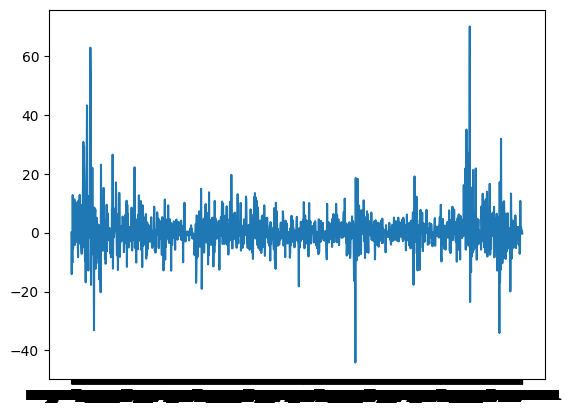

In [ ]:
data_change = data['Change%'] #with negative and postive values of change% 
plt.plot(data_change, label = 'Changing Evolution')
plt.show()

In [ ]:
data.shape
data.head()


,Price(in dollars),Open,High,Low,Vol.,Change%
Date,,,,,,
"Nov 09, 2017",1.99,1.99,2.20,1.90,283.35K,0.00
"Nov 10, 2017",1.71,1.99,2.02,1.60,483.23K,-14.07
"Nov 11, 2017",1.66,1.71,1.93,1.58,256.71K,-2.92
"Nov 12, 2017",1.49,1.66,1.70,1.34,456.48K,-10.24
"Nov 13, 2017",1.68,1.49,1.74,1.49,166.01K,12.75


In [ ]:
# selectimg columns
data = data[['Price(in dollars)', 'Open', 'High', 'Low', 'Vol.', 'Change%']]

cleaning data:

In [ ]:
# convert 'Vol.' column to numeric

# data['Vol.'] = data['Vol.'].replace('K', '000').replace('M', '000000')
# data['Vol.'] = data['Vol.'].replace({'K': '000','M': '000000'})
# abouve didn't worked for me 'cause error said igt could not convert string to float: '1.62 M'", 
# means there appears to be a space between the value and unit (M or K) in some of the rows of the 'Vol.' column in my data 
# so we replaced space with '',it will remove any space characters from the string.

#here i used .str becz we are to replace a substring in each element of 'Vol.' column .str.replace() method
#  replaces all occurrences of a substring with another substring in each element.

data['Vol.'] = data['Vol.'].str.replace(' ', '').str.replace('K', '000').str.replace('M', '000000')

# or we can also  used lambda which will apply replacw to individual element in vol. column
# data['Vol.'] = data['Vol.'].apply(lambda x: x.replace(' ', '').replace('K', '000').replace('M', '000000'))




In [ ]:
mask = data['Change%'] >= 0

#new dataframe with non-negative Change% rows
df_new = data[mask].reset_index(drop=False)

# print original dataframe and new dataframe
print("Original dataframe:")
print(data.head())
print("\nNew dataframe with non-negative(positive) Change% rows:")
print(df_new.head())


Original dataframe:
              Price(in dollars)  Open  High   Low       Vol.  Change%
Date                                                                 
Nov 09, 2017               1.99  1.99  2.20  1.90  283.35000     0.00
Nov 10, 2017               1.71  1.99  2.02  1.60  483.23000   -14.07
Nov 11, 2017               1.66  1.71  1.93  1.58  256.71000    -2.92
Nov 12, 2017               1.49  1.66  1.70  1.34  456.48000   -10.24
Nov 13, 2017               1.68  1.49  1.74  1.49  166.01000    12.75

New dataframe with non-negative(positive) Change% rows:
           Date  Price(in dollars)  Open  High   Low       Vol.  Change%
0  Nov 09, 2017               1.99  1.99  2.20  1.90  283.35000     0.00
1  Nov 13, 2017               1.68  1.49  1.74  1.49  166.01000    12.75
2  Nov 16, 2017               1.56  1.55  1.67  1.51  193.73000     0.65
3  Nov 18, 2017               1.67  1.50  1.67  1.49  168.62000    11.33
4  Nov 20, 2017               1.64  1.60  1.65  1.56  158.70000     

In [ ]:
df_new.dtypes

Date                  object
Price(in dollars)    float64
Open                 float64
High                 float64
Low                  float64
Vol.                  object
Change%              float64
dtype: object

In [ ]:
# removing rows containg'-' from vol.
df_new = df_new[df_new['Vol.'] != '-']
df_new['Vol.']
# chnaging vol. to float datatype
df_new['Vol.'] = df_new['Vol.'].astype(float)
df_new['Vol.'].dtype

dtype('float64')

In [ ]:
# df_new = df_new.reset_index()
# df_new

**Test Train Set**

In [ ]:

def create_train_test_set(new_df):
    # extract features and target
    features = new_df[['Price(in dollars)', 'Open', 'High', 'Low', 'Vol.']]
    target = new_df['Change%']

    # set data length and split percentages
    data_len = len(new_df)
    #  0.7 that is 70% is used for training data.
    train_split = int(data_len * 0.7)

    # 0.2 that is 20% is used for validation.
    val_split = int(data_len * 0.2)

    # remaining percentage of the data that is not used in the training and validation sets is 
    # used for the test set that is 10% is used for testing data.
    test_split = data_len - train_split - val_split

    # split data into train, validation, and test sets
    X_train, X_val, X_test = features[:train_split], features[train_split : train_split + val_split], features[train_split + val_split:]
    y_train, y_val, y_test = target[: train_split], target[train_split : train_split + val_split], target[train_split + val_split :]

    # print sizes of train, validation, and test sets
    print(f"Train set size: {len(X_train)}")
    print(f"Validation set size: {len(X_val)}")
    print(f"Test set size: {len(X_test)}")

    return X_train, X_val, X_test, y_train, y_val, y_test


In [ ]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(df_new)

Train set size: 507
Validation set size: 145
Test set size: 73


Prediction using Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# y = mx + c ( m=slope of the line, c = y-intercept)
# The coefficients represent the slope of the linear relationship between each feature and the target variable. 
# They indicate the amount by which the target variable is expected to change, on average, when the corresponding feature
#  increases by one unit, while holding all other features constant.
# The intercept represents the expected value of the target variable when all features are equal to zero.
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)

LR Coefficients: 
 [ 5.75363682e+00 -7.44318833e+00  1.31277208e+00  5.96550471e-02
  3.83972997e-04]
LR Intercept: 
 4.7176351806840975


**Evaluation**

In [ ]:
print("Performance (R^2): ", lr.score(X_train, Y_train))

Performance (R^2):  0.7798001991715996


In [ ]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

**Predict for the test dataset**

In [ ]:
Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)
#Y_test_pred


In [ ]:
from sklearn import metrics

1. R-squared (R^2): a measure of how well the model fits the data. It ranges from 0 to 1, with 1 indicating a perfect fit.Higher values indicate a better fit

2. Explained variation: a measure of how much of the variance in the data is explained by the model. It ranges from 0 to 1, with 1 indicating that the model explains all of the variation. Higher values indicate a better fit.

3. Mean absolute percentage error (MAPE): a measure of the percentage difference between the predicted and actual values. It is calculated as the average of the absolute( the predicted - actual values)/ the actual values, and multiplied by 100. Lower values indicate better performance.

4. Mean squared error (MSE): a measure of the average squared difference between the predicted and actual values.Lower values indicate better performance.

5. Root mean squared error (RMSE): the square root of the MSE, which gives a measure of the average magnitude of the errors.Lower values indicate better performance.

6. Mean absolute error (MAE): a measure of the average absolute difference between the predicted and actual values. Lower values indicate better performance.

In [ ]:
print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(Y_train,Y_train_pred),2))
print('Training MAPE:', round(get_mape(Y_train,Y_train_pred), 2)) 
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(Y_train,Y_train_pred),2))

print(' ')

print("Validation R-squared: ",round(metrics.r2_score(Y_val,Y_val_pred),2))
print("Validation Explained Variation: ",round(metrics.explained_variance_score(Y_val,Y_val_pred),2))
print('Validation MAPE:', round(get_mape(Y_val,Y_val_pred), 2)) 
print('Validation Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_val,Y_val_pred)),2))
print("Validation MAE: ",round(metrics.mean_absolute_error(Y_val,Y_val_pred),2))

print(' ')

print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(Y_test,Y_test_pred),2))
print('Test MAPE:', round(get_mape(Y_test,Y_test_pred), 2)) 
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2)) 
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))

Training R-squared:  0.78
Training Explained Variation:  0.78
Training MAPE: inf
Training Mean Squared Error: 7.39
Training RMSE:  2.72
Training MAE:  1.54
 
Validation R-squared:  -113.64
Validation Explained Variation:  -110.63
Validation MAPE: inf
Validation Mean Squared Error: 7.39
Validation RMSE:  81.96
Validation MAE:  19.13
 
Test R-squared:  -565.31
Test Explained Variation:  -517.19
Test MAPE: 6945.37
Test Mean Squared Error: 17227.87
Test RMSE:  131.25
Test MAE:  91.69


<ipython-input-449-727ef42a3d29>:6: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
<ipython-input-449-727ef42a3d29>:6: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [ ]:
print(data.columns)
print(df_new.columns)

Index(['Price(in dollars)', 'Open', 'High', 'Low', 'Vol.', 'Change%'], dtype='object')
Index(['Date', 'Price(in dollars)', 'Open', 'High', 'Low', 'Vol.', 'Change%'], dtype='object')


In [ ]:
df_pred = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)
df_pred['Predicted'] = Y_val_pred
df_pred = df_pred.reset_index()
df_pred.iloc[:,:]
df_pred

,index,Actual,Predicted
0,508,1.85,1.556495
1,509,3.89,4.373648
2,510,0.62,0.403716
3,511,0.36,-0.035586
4,512,5.10,5.609603
...,...,...,...
140,648,21.27,260.095735
141,649,0.58,-43.973097
142,650,0.28,-54.945103
143,651,6.08,34.994305


 **Plot Predicted vs Actual Prices on Time Series**

<Axes: >

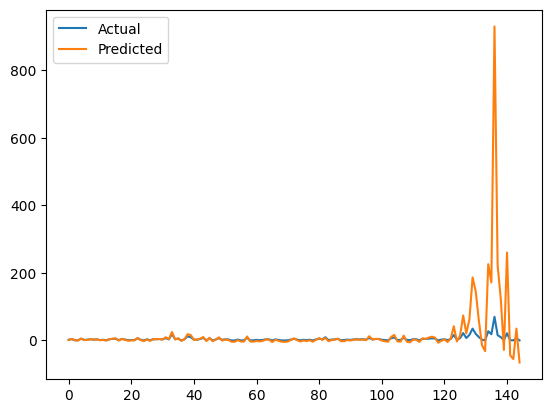

In [ ]:
df_pred[['Actual', 'Predicted']].plot()
